In [2]:
from pathlib import Path 
import sys 
import os 
PATH = Path.cwd() # '/home/kitadam/ENR_Sven/inugami_curse/src'
print(PATH)
sys.path.insert(0, str(Path(PATH).parent))
!echo $VIRTUAL_ENV
import pickle 
import numpy as np 
# !{sys.executable} -m pip install aug-sfutils mmap_ninja

/scratch/project_2005083/latent-state-modeling/src/notebooks
/scratch/project_2005083/latent-state-modeling/.venv


In [2]:
# import data 
import matplotlib.pyplot as plt 

31
10
0
366


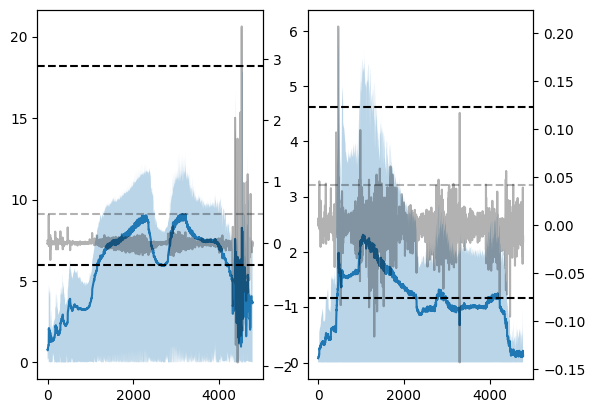

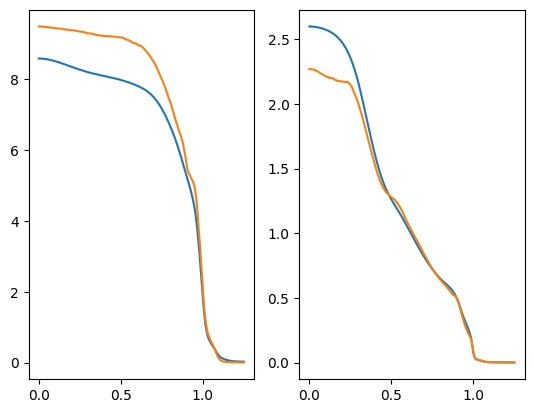

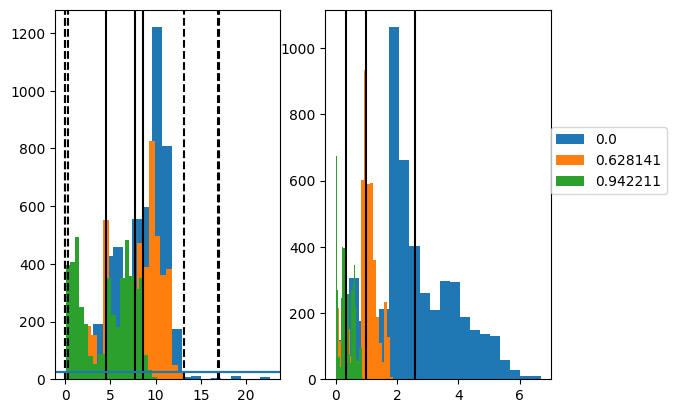

In [102]:
array_loc = '/scratch/project_2005083/latent-state-modeling/local_data_test/'

shotno = 30659

shotno = 41437 # possibly an outlier 
shotno = 41210
shotno = 30003
shotno = 36537
shotno = 30803
shotno = 30003
shotno = 41060 # not an outlier but classified as such..
shotno = 32587


try: 
    profs = np.load(array_loc + f'{shotno}_PROFS.npy')# 30003_PROFS.npy
    mps = np.load(array_loc + f'{shotno}_MP.npy')
    radius = np.load(array_loc + f'{shotno}_RADII.npy')[0]
    ne, te = profs[:, 0], profs[:, 1]
except FileNotFoundError as e: 
    filename = f'/scratch/project_2005083/moxie/data/raw/RAW_AUG_PULSES/{shotno}'
    with open(filename, 'rb') as file: 
        pulse_dict = pickle.load(file)
    profile_data, mp_data = pulse_dict['profiles'], pulse_dict['machine_parameters']
    ida_times, ne, te, radius = profile_data['time'], profile_data['ne'], profile_data['Te'], profile_data['radius']
    if ne.shape[0] == 200: 
        # get time on 1st dimension of array for AUG pulses
        ne, te, radius = ne.T, te.T, radius.T
    radius = radius[0]

# 
ne *= 1e-19
te *= 1e-3
fig, axs = plt.subplots(1, 2)

quants = np.quantile(ne, [0.1, 0.5, 0.9], axis=1)
axs[0].plot(ne.mean(axis=1))
axs[0].fill_between(range(len(ne)), quants[0], quants[2], alpha=0.3)
ne_twin = axs[0].twinx()
ne_twin.plot(np.gradient(ne.mean(axis=1)), c='k', alpha=0.3)
ne_twin.axhline(np.gradient(ne.mean(axis=1)).mean() + 3*np.gradient(ne.mean(axis=1)).std(), ls='--', c='k', alpha=0.3)

axs[0].axhline(ne.mean() + 3*ne.std(), c='k', ls='--')
axs[0].axhline(ne.mean(), c='k', ls='--')

# print((ne.mean(axis=1) > ne.mean() + 3*ne.std()).sum())
ne_bool = np.logical_and(np.gradient(ne.mean(axis=1)) > np.gradient(ne.mean(axis=1)).mean() + 3*np.gradient(ne.mean(axis=1)).std(), np.gradient(ne.mean(axis=1)) > 0.5)
print(ne_bool.sum())
print((quants[2] > ne.mean() + 3*ne.std()).sum())

axs[1].plot(te.mean(axis=1))
quants = np.quantile(te, [0.1, 0.5, 0.9], axis=1)
axs[1].fill_between(range(len(te)), quants[0], quants[2], alpha=0.3)
axs[1].axhline(te.mean() + 3*te.std(), c='k', ls='--')
axs[1].axhline(te.mean(), c='k', ls='--')

te_twin = axs[1].twinx()
te_twin.plot(np.gradient(te.mean(axis=1)), c='k', alpha=0.3)
te_twin.axhline(np.gradient(te.mean(axis=1)).mean() + 3*np.gradient(te.mean(axis=1)).std(), ls='--', c='k', alpha=0.3)


te_bool = np.logical_and(np.gradient(te.mean(axis=1)) > np.gradient(te.mean(axis=1)).mean() + 3*np.gradient(te.mean(axis=1)).std(), np.gradient(te.mean(axis=1)) > 0.5)
print(te_bool.sum())
print((quants[2] > te.mean() + 3*te.std()).sum())


plt.show()

fig, axs = plt.subplots(1, 2)

axs[0].plot(radius, ne.mean(axis=0))

low, mid, high = np.quantile(ne, [0.1, 0.5, 0.9], axis=0)
# axs[0].fill_between(radius, mid+high, mid-low, alpha=0.4)
axs[0].plot(radius, mid)

axs[1].plot(radius, te.mean(axis=0))
low, mid, high = np.quantile(te, [0.1, 0.5, 0.9], axis=0)
axs[1].plot(radius, mid)

plt.show()

fig, axs = plt.subplots(1, 2) 


i = 0
for i in [0, 100, 150]: 
    axs[0].hist(ne[:, i], bins=20)
    axs[0].axvline(ne[:, i].mean(), c='black')
    axs[0].axvline(ne[:, i].mean() + 3*ne[:, i].std(), c='black', ls='--')
    axs[0].axvline(np.clip(ne[:, i].mean() - 3*ne[:, i].std(), a_min=0.0, a_max=None), c='black', ls='--')
    axs[0].axhline(25)
    axs[1].axvline(te[:, i].mean(), c='black')
    axs[1].hist(te[:, i], bins=20, label=radius[i])
    axs[1].legend(loc=(1.0, 0.5))
plt.show()


In [3]:
filename = '/scratch/project_2005083/moxie/data/raw/RAW_AUG_PULSES/30265'
with open(filename, 'rb') as file: 
    pulse_dict = pickle.load(file)
    

22:35:21 | aug_sfutils | INFO: Using version 0.8.9
Traceback (most recent call last):
  File "/scratch/project_2005083/latent-state-modeling/.venv/lib64/python3.9/site-packages/aug_sfutils/__init__.py", line 29, in <module>
    from .ww import *
  File "/scratch/project_2005083/latent-state-modeling/.venv/lib64/python3.9/site-packages/aug_sfutils/ww.py", line 14, in <module>
    libddww = ct.cdll.LoadLibrary(wwlib)
  File "/usr/lib64/python3.9/ctypes/__init__.py", line 452, in LoadLibrary
    return self._dlltype(name)
  File "/usr/lib64/python3.9/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /shares/software/aug-dv/moduledata/ads/Linux-generic-x86_64/lib64/libddww8.so: cannot open shared object file: No such file or directory
22:35:22 | aug_sfutils | WARNING: ww not loaded
Traceback (most recent call last):
  File "/scratch/project_2005083/latent-state-modeling/.venv/lib64/python3.9/site-packages/aug_sfutils/__init__.py", line 34, in 

In [4]:
pulse_dict['profiles']

{'time': SFOBJ([0.225    , 0.226    , 0.227    , ..., 6.6710005, 6.6720004,
        6.6730003], dtype=float32),
 'radius': SFOBJ([[0.     , 0.     , 0.     , ..., 0.     , 0.     , 0.     ],
        [0.00603, 0.00603, 0.00603, ..., 0.00603, 0.00603, 0.00603],
        [0.01206, 0.01206, 0.01206, ..., 0.01206, 0.01206, 0.01206],
        ...,
        [1.18794, 1.18794, 1.18794, ..., 1.18794, 1.18794, 1.18794],
        [1.19397, 1.19397, 1.19397, ..., 1.19397, 1.19397, 1.19397],
        [1.2    , 1.2    , 1.2    , ..., 1.2    , 1.2    , 1.2    ]],
       dtype=float32),
 'Te': None,
 'ne': SFOBJ([[1.5450982e+19, 1.5730683e+19, 1.5626879e+19, ..., 5.4024007e+19,
         5.3631292e+19, 5.4993789e+19],
        [1.5451331e+19, 1.5730942e+19, 1.5627165e+19, ..., 5.4013627e+19,
         5.3620605e+19, 5.4982086e+19],
        [1.5452331e+19, 1.5731671e+19, 1.5627971e+19, ..., 5.3982920e+19,
         5.3589009e+19, 5.4947478e+19],
        ...,
        [1.0348485e+16, 1.0375111e+16, 1.0393933e+16,

In [7]:
journal = pulse_dict['journal']
journal 

{'shotno': 30265,
 'program': b'DP_1MA_ecrh_O1.xml',
 'clearance': b'',
 'datum': b'2014-02-27',
 'time': b'16:11',
 'leader': b'jfs/mfw',
 'konf_il': b'',
 'konf_al': b'',
 'konf_snu': b'SNu',
 'konf_sno': b'',
 'konf_dn': b'',
 'typ': b'plasma',
 'useful': b'yes',
 'b_hmod': b'HMOD',
 'b_lmod': b'',
 'b_imprh': b'',
 'b_itb': b'',
 'b_blim': b'',
 'b_dlim': b'',
 'b_disb': b'',
 'b_disr': b'',
 'b_dise': b'',
 'b_vdeo': b'',
 'b_vdeu': b'',
 'b_nobd': b'',
 'b_res': b'',
 'b_fail': b'',
 'b_stable': b'',
 'b_sweep': b'',
 'b_cdh': b'',
 'b_run': b'',
 'vessel': b'Div III',
 'coat': b'Bor',
 'coatdate': b'2014-02-24',
 'proposal': b'1665',
 'yag': b'',
 'lagereg': b'Rcurr_Zcurr                        0.043Raus_Zsquad                        0.589',
 'lagecom1': b'',
 'lagecom2': b'',
 'formreg': b'CoI_load_balance_V2                0.589Zger_V1u_V2_V3_OH2u                1.189',
 'formcom1': b'',
 'formcom2': b'',
 'remarks': b'**  O1 heating\nECRH @ 105 GHz\n\n',
 'flatb': 1.171,
 'fl

In [8]:
int(journal['proposal'])

1665

In [ ]:
import pandas as pd 

save_df = {}

pulse_metadata = {'shotreq': int(journal['proposal'])} 
save_df['30265'] = pulse_metadata

pd.DataFrame()

In [10]:
negative_byte = b''
(pulse_dict['journal']['gas_ne'] == negative_byte and
 pulse_dict['journal']['gas_ar'] == negative_byte and
 pulse_dict['journal']['gas_n2'] == negative_byte and
 pulse_dict['journal']['gas_kr'] == negative_byte and 
 pulse_dict['journal']['gas_xe'] == negative_byte and
 pulse_dict['journal']['gas_cd4'] == negative_byte and
  (pulse_dict['machine_parameters']['N_tot']['data'] < 0.001).all())

SFOBJ(True)

/scratch/project_2005083/latent-state-modeling/src/notebooks


In [4]:
import data._utils as datautils 

ModuleNotFoundError: No module named 'mmap_ninja'